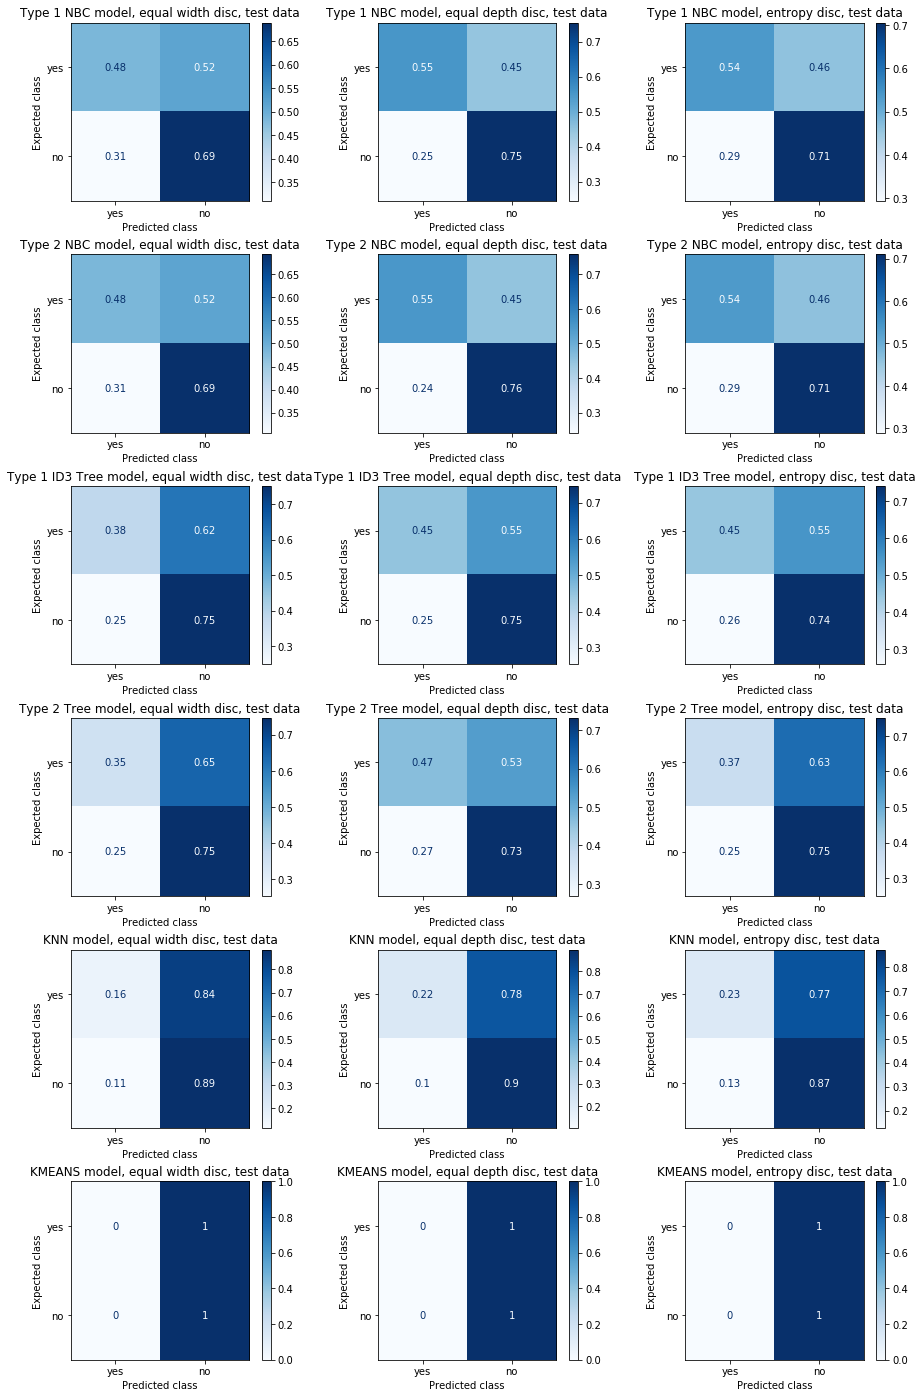

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("C:\output\Per sample results for test data.csv")
y_true = df["class"]
y_preds = [df[col] for col in df.drop(labels=["class"], axis=1)][1:]
classes = y_true.unique()
# Inspired by https://stackoverflow.com/questions/59165149/plot-confusion-matrix-with-scikit-learn-without-a-classifier
# And https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
cols, rows = 3, len(y_preds) // 3
fig, axes = plt.subplots(rows, cols, squeeze=False)
alst = []
for items in axes:
    alst += [*items]
np.set_printoptions(precision=2)
for y_pred, ax in zip(y_preds, alst):
    mtx = confusion_matrix(y_true, y_pred, labels=classes)
    ConfusionMatrixDisplay(mtx, display_labels=classes).plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(y_pred.name)
    ax.set_ylabel("Expected class")
    ax.set_xlabel("Predicted class")
fig.subplots_adjust(hspace=0.30)
fig.set_size_inches(cols * 5.2, rows * 4.1)